In our 'explore.py' we've tried a number of models and a number of different training durations for each. In this notebook we'll explore if any of them are any good.

In [2]:
import os
import pickle

x_test = pickle.load(open("models/x_test.pkl","rb"))
y_test = pickle.load(open("models/y_test.pkl","rb"))

models = dict()
for dirname, _, filenames in os.walk("models/"):
        for filename in filenames:

            if not "_" in filename:
                thisFile = os.path.join(dirname, filename)
                thisModel = pickle.load(open(thisFile,"rb"))
                models[filename] = thisModel



Let's look at lbfgs first:

In [3]:
from sklearn.neural_network import MLPRegressor
solver_name = "lbfgs"

errors = dict()
for iter in range(1,19):
    strName = f"{solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)


{1: -44.066535513978415, 2: -333.49716468141776, 3: -39.443074814495745, 4: -1.586279870362516, 5: -0.2566078253032993, 6: -0.06329203294010011, 7: -0.06329203294010011, 8: -0.06329203294010011, 9: -0.06329203294010011, 10: -0.06329203294010011, 11: -0.06329203294010011, 12: -0.06329203294010011, 13: -0.06329203294010011, 14: -0.06329203294010011, 15: -0.06329203294010011, 16: -0.06329203294010011, 17: -0.06329203294010011, 18: -0.06329203294010011}


OK, so the predictions are terrible. Can we visualise the least terrible ones?

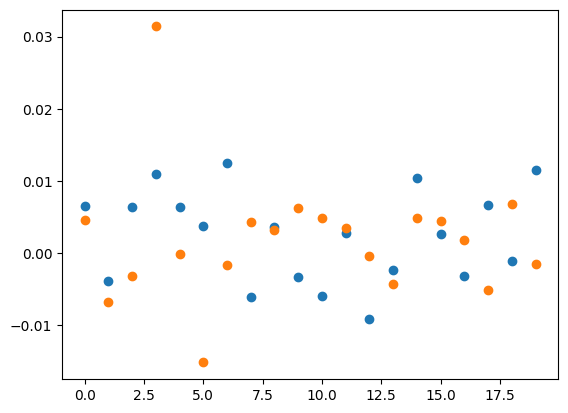

In [6]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["lbfgs - 14.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

Bad, let's look at sgd:

In [7]:
from sklearn.neural_network import MLPRegressor
solver_name = "sgd"

errors = dict()
for iter in range(1,19):
    strName = f"{solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)

{1: -0.10153990484682751, 2: -0.45287321633231326, 3: -0.5610955117568404, 4: -0.5610955117568404, 5: -0.5610955117568404, 6: -0.5610955117568404, 7: -0.5610955117568404, 8: -0.5610955117568404, 9: -0.5610955117568404, 10: -0.5610955117568404, 11: -0.5610955117568404, 12: -0.5610955117568404, 13: -0.5610955117568404, 14: -0.5610955117568404, 15: -0.5610955117568404, 16: -0.5610955117568404, 17: -0.5610955117568404, 18: -0.5610955117568404}


Still very bad, if anything worse.

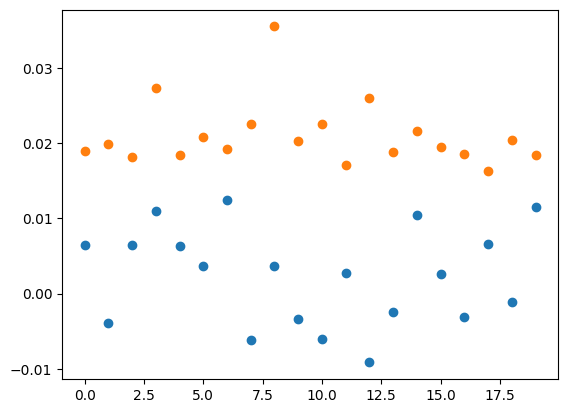

In [8]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["sgd - 14.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

Terrible. Adam said it had converged. Onto what I wonder:

In [9]:
from sklearn.neural_network import MLPRegressor
solver_name = "adam"

errors = dict()
for iter in range(1,19):
    strName = f"{solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)

{1: -36.74083230519273, 2: -762.9424949482079, 3: -1131.8522793199136, 4: -1153.0439240256908, 5: -1153.0439240256908, 6: -1153.0439240256908, 7: -1153.0439240256908, 8: -1153.0439240256908, 9: -1153.0439240256908, 10: -1153.0439240256908, 11: -1153.0439240256908, 12: -1153.0439240256908, 13: -1153.0439240256908, 14: -1153.0439240256908, 15: -1153.0439240256908, 16: -1153.0439240256908, 17: -1153.0439240256908, 18: -inf}


c:\Users\martin\miniconda3\envs\nlp-headlines\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


Absolute garbage.

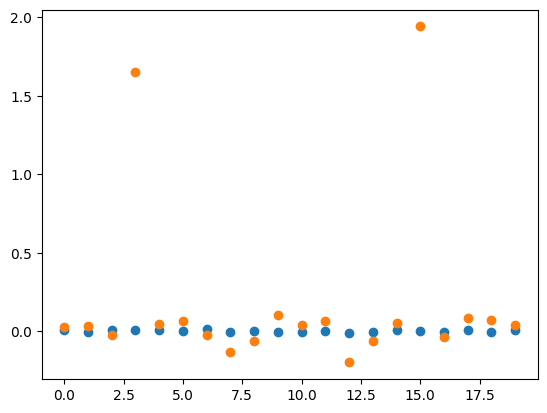

In [10]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["adam - 14.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()